# Ouitlier
Outlier is observation is outside the data trend

## One Variable Outlier Observations

In [43]:
import seaborn as sns
import pandas as pd
import numpy as np

In [44]:
df = sns.load_dataset('diamonds')
df = df.select_dtypes(include = ['float64', 'int64']) # choose numeric variables
df.dropna(inplace = True) 
table = df['table']
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


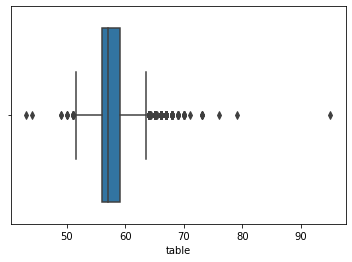

In [45]:
sns.boxplot(x = table);

In [46]:
Q1 = table.quantile(0.25)
Q3 = table.quantile(0.75)
IQR = Q3 - Q1
print(Q3,Q1,IQR)

59.0 56.0 3.0


In [47]:
botBound = Q1 - 1.5*IQR
topBound = Q3 + 1.5*IQR
print(topBound,botBound)

63.5 51.5


In [48]:
topOutlier = table > topBound
botOutlier = table < botBound

In [49]:
print(table[botOutlier].size)
print(table[botOutlier].index)
print(table[topOutlier].size)
print(table[topOutlier].index)

16
Int64Index([ 1515,  3238,  3979,  4150,  5979,  7418,  8853, 11368, 22701,
            25179, 26387, 33586, 35633, 45798, 46040, 47630],
           dtype='int64')
589
Int64Index([    2,    91,   145,   219,   227,   239,   296,   314,   356,
              359,
            ...
            53226, 53503, 53542, 53577, 53660, 53695, 53697, 53756, 53757,
            53785],
           dtype='int64', length=589)


### Delete Operation

In [52]:
cleanTableDf = table[~((table < (botBound))|(table > (topBound)))]

In [54]:
cleanTableDf

0        55.0
1        61.0
3        58.0
4        58.0
5        57.0
         ... 
53935    57.0
53936    55.0
53937    60.0
53938    58.0
53939    55.0
Name: table, Length: 53335, dtype: float64

### Fill Mean Outliers

In [62]:
table[botOutlier] = cleanTableDf.mean()
table[botOutlier] 

1515     57.373404
3238     57.373404
3979     57.373404
4150     57.373404
5979     57.373404
7418     57.373404
8853     57.373404
11368    57.373404
22701    57.373404
25179    57.373404
26387    57.373404
33586    57.373404
35633    57.373404
45798    57.373404
46040    57.373404
47630    57.373404
Name: table, dtype: object

### Convergence

In [64]:
table[botOutlier] = botBound
table[topOutlier] = topBound
table[botOutlier]

1515     51.5
3238     51.5
3979     51.5
4150     51.5
5979     51.5
7418     51.5
8853     51.5
11368    51.5
22701    51.5
25179    51.5
26387    51.5
33586    51.5
35633    51.5
45798    51.5
46040    51.5
47630    51.5
Name: table, dtype: object

## Two Variable Outlier Observations
### Local Outlier Factor

In [68]:
df = sns.load_dataset('diamonds')
df = df.select_dtypes(include = ['float64', 'int64']) # choose numeric variables
df.dropna(inplace = True) 
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [105]:
import numpy as np
from sklearn.neighbors import LocalOutlierFactor

In [107]:
clf = LocalOutlierFactor(n_neighbors = 20, contamination = 0.1)
clf.fit_predict(df)
df_scores = clf.negative_outlier_factor_
bound_value = np.sort(df_scores)[13]
outlier_df = df_scores > bound_value

### Delete

In [108]:
df[df_scores > bound_value]

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


### Convergence

In [110]:
convergence_value = df[df_scores == bound_value]
convergence_value=convergence_value.to_records(index = False)

In [111]:
outlier = df[~outlier_df]
outlier

,carat,depth,table,price,x,y,z
6341,1.00,44.0,53.0,4032,6.31,6.24,4.12
10377,1.09,43.0,54.0,4778,6.53,6.55,4.12
24067,2.00,58.9,57.0,12210,8.09,58.90,8.06
31230,0.45,68.6,57.0,756,4.73,4.50,3.19
35633,0.29,62.8,44.0,474,4.20,4.24,2.65
36503,0.30,51.0,67.0,945,4.67,4.62,2.37
38840,0.73,70.8,55.0,1049,5.51,5.34,3.84
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42
45688,0.70,71.6,55.0,1696,5.47,5.28,3.85
48410,0.51,61.8,54.7,1970,5.12,5.15,31.80


In [112]:
convergensed = outlier.to_records(index = False)

In [113]:
convergensed[:] = convergence_value
convergensed

rec.array([(0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19)],
          dtype=[('carat', '<f8'), ('depth', '<f8'), ('table', '<f8'), ('price', '<i8'), ('x', '<f8'), ('y', '<f8'), ('z', '<f8')])

In [114]:
outlier = pd.DataFrame(convergensed, index = outlier.index)

In [115]:
outlier

,carat,depth,table,price,x,y,z
6341,0.45,68.6,57.0,756,4.73,4.5,3.19
10377,0.45,68.6,57.0,756,4.73,4.5,3.19
24067,0.45,68.6,57.0,756,4.73,4.5,3.19
31230,0.45,68.6,57.0,756,4.73,4.5,3.19
35633,0.45,68.6,57.0,756,4.73,4.5,3.19
36503,0.45,68.6,57.0,756,4.73,4.5,3.19
38840,0.45,68.6,57.0,756,4.73,4.5,3.19
41918,0.45,68.6,57.0,756,4.73,4.5,3.19
45688,0.45,68.6,57.0,756,4.73,4.5,3.19
48410,0.45,68.6,57.0,756,4.73,4.5,3.19
